<a href="https://colab.research.google.com/github/ali-talebi/project_industrial/blob/main/machine_leaning_package_detect_defect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import numpy as np 
import cv2 
import os 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 

In [3]:
!unzip "/content/drive/MyDrive/Master Courses /Term2/project/archive.zip"

Archive:  /content/drive/MyDrive/Master Courses /Term2/project/archive.zip
  inflating: damaged/side/0101069901524_side.png  
  inflating: damaged/side/0105413725474_side.png  
  inflating: damaged/side/0109451226527_side.png  
  inflating: damaged/side/0111632059302_side.png  
  inflating: damaged/side/0118055224146_side.png  
  inflating: damaged/side/0120928945494_side.png  
  inflating: damaged/side/0122691608037_side.png  
  inflating: damaged/side/0123374171704_side.png  
  inflating: damaged/side/0129768769736_side.png  
  inflating: damaged/side/0163723873967_side.png  
  inflating: damaged/side/0185507921789_side.png  
  inflating: damaged/side/0185973818825_side.png  
  inflating: damaged/side/0188055850357_side.png  
  inflating: damaged/side/0197052530143_side.png  
  inflating: damaged/side/0198998397732_side.png  
  inflating: damaged/side/0205031618492_side.png  
  inflating: damaged/side/0205275090120_side.png  
  inflating: damaged/side/0214448761111_side.png  
  infla

In [4]:
Total_img   = []
Total_lable = []

In [5]:
for i in os.listdir("/content/damaged")  : 
  for j in os.listdir(f"/content/damaged/{i}") : 
    img = cv2.imread(f"/content/damaged/{i}/{j}")  
    img = cv2.resize(img , (224,224)  ) 
    Total_img.append(img)
    Total_lable.append("damaged")

  

    

In [6]:
print("len total data damage : " , len(Total_img) )
print("len total label damage : " , len(Total_lable))

len total data damage :  200
len total label damage :  200


In [7]:
for i in os.listdir("/content/intact")  : 
  for j in os.listdir(f"/content/intact/{i}") : 
    img = cv2.imread(f"/content/intact/{i}/{j}")  
    img = cv2.resize(img ,  (224,224) ) 
    
    Total_img.append(img)
    Total_lable.append("intact") 



  

    

In [8]:
print("len total data damage : " , len(Total_img) )
print("len total label damage : " , len(Total_lable))

len total data damage :  400
len total label damage :  400


In [9]:
Total_img = np.array(Total_img).astype("float") / 255.0 
Total_lable = np.array(Total_lable) 

In [10]:
Total_img.shape 

(400, 224, 224, 3)

In [11]:
x_train , x_test , y_train , y_test = train_test_split(Total_img , Total_lable , test_size = 0.2 , random_state= 42 , shuffle= True  ) 

In [12]:
obj_label_coder = LabelEncoder()
y_train = obj_label_coder.fit_transform(y_train)
y_test  = obj_label_coder.transform(y_test)

In [13]:
y_train.shape 

(320,)

In [16]:
y_train[:10]

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0])

In [14]:
x_train.shape 

(320, 224, 224, 3)

In [18]:
224 * 224 * 3 

150528

In [19]:
x_train = x_train.reshape(320 , 150528 )
x_test  = x_test.reshape(80  , 150528 )

In [25]:
params = {'C':[1 , 10 , 100 ] , 'gamma':[1 , 0.1 , 0.01] }

In [26]:
model = GridSearchCV(SVC() , params , cv = 5  )

In [27]:
model.fit(x_train , y_train )
predict = model.predict(x_test)

In [28]:
accuracy_score(predict , y_test )

0.4625

please enter number on picture in range(0 - 79) 50
prediction is :  ['intact']
True Answer is :  ['damaged']


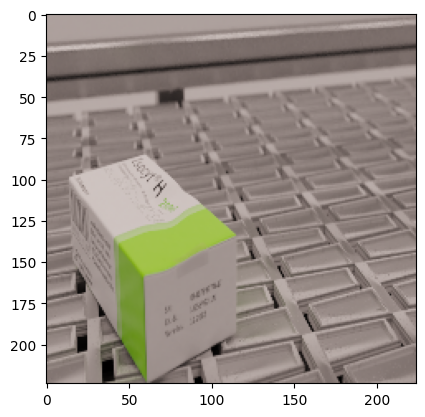

In [41]:
vorodi = int(input("please enter number on picture in range(0 - 79) "))
plt.imshow(x_test[vorodi].reshape(224,224,3))
print("prediction is : " , obj_label_coder.inverse_transform([predict[vorodi]]))
print("True Answer is : " ,obj_label_coder.inverse_transform([y_test[vorodi]]) )
plt.show()

In [31]:
obj_classifier = RandomForestClassifier()
obj_classifier.fit(x_train , y_train )
predict_random_forest_classifier = obj_classifier.predict(x_test)

In [32]:
accuracy_score(predict_random_forest_classifier , y_test )

0.425

In [ ]:
obj_label_coder.inverse_transform()

please enter number on picture in range(0 - 79) 20
prediction is :  ['intact']
True Answer is :  ['damaged']


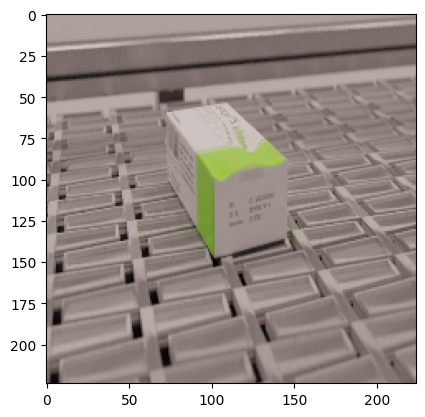

In [39]:
vorodi = int(input("please enter number on picture in range(0 - 79) "))
plt.imshow(x_test[vorodi].reshape(224,224,3))
print("prediction is : " , obj_label_coder.inverse_transform([predict_random_forest_classifier[vorodi]]))
print("True Answer is : " ,obj_label_coder.inverse_transform([y_test[vorodi]]) )
plt.show()